In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import sqlalchemy as sa
sys.path.append(os.path.abspath(os.path.join('..','..','..')))
from pudl import pudl, ferc1, eia923, settings, constants, analysis
from pudl import models, models_ferc1, models_eia923, outputs
from pudl import clean_eia923, clean_ferc1, clean_pudl, mcoe
import matplotlib.pyplot as plt
import matplotlib as mpl
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.dpi'] = 150
pd.options.display.max_columns = 56
pd.options.display.max_rows = 100

In [2]:
pudl_engine  = pudl.db_connect_pudl()

# Pulling the required tables

In [3]:
# Bring in pudl IDs for all EIA plants
# pudl_ids = g9 = analysis.simple_select('plants_eia', pudl_engine)

In [4]:
# pudl_ids.head()
# ids = pudl_ids["plant_id_pudl"]
# plnts = pudl_ids[ids.isin(ids[ids.duplicated()])]
# plnts.plant_id_pudl.unique()
# # plnts

### Fuel Receipts Costs EIA923

In [5]:
# Convert the fuel_receipts_costs_eia923 table into a dataframe
frc9 = mcoe.fuel_reciepts_costs_pull_eia923(pudl_engine)
frc9_summed = frc9[0]
frc9_summed_plant = frc9[1]

In [6]:
# frc9 = frc9.set_index(pd.DatetimeIndex(frc9['report_date']))

In [7]:
# # Identify the primary fuel for each plant; later assign all fuel costs to that category, so secondary fuels aren't lost
# frc_df = analysis.primary_fuel_frc_eia923(frc9, id_col='plant_id_eia', fuel_thresh = .95)

In [8]:
# frc_df_coal = frc_df[frc_df['primary_fuel']=='Coal']
# len(frc_df_coal.plant_id_eia.unique())

In [9]:
# plants = frc_df_coal.plant_id_eia.unique()

In [10]:
# frc9 = frc9[frc9['plant_id_eia'].isin(plants)]

In [11]:
# frc9.drop('report_date', axis=1, inplace=True)
# frc9.reset_index(inplace=True)

## This forcing of energy source column to coal is problematic & needs to be undone

In [12]:
# change energy source column to coal
# frc9['energy_source'] = 'Coal'

In [13]:
# Get yearly fuel cost by plant_id, year and energy_source
# frc9_summed = analysis.yearly_sum_eia(frc9 , 'fuel_cost', columns=['plant_id_eia', 'plant_id_pudl','report_year','energy_source_cons']) #toggle
# frc9_summed = frc9_summed.reset_index()
# frc9_summed = frc9_summed.rename(columns={'primary_fuel': 'energy_source'})

In [14]:
frc9_summed.head()

,plant_id_eia,report_year,energy_source_cons,mmbtu,plant_id_pudl,fuel_cost,fuel_cost_per_mmbtu_average
0,3,2009,coal,8.784741e+07,32,3.019373e+08,3.437065
1,3,2009,gas,4.316773e+07,32,1.881205e+08,4.357896
2,3,2010,coal,8.315514e+07,32,3.124745e+08,3.757729
3,3,2010,gas,5.171804e+07,32,2.463235e+08,4.762817
4,3,2011,coal,4.714560e+07,32,2.025195e+08,4.295619


In [15]:
# frc9_mmbtu_summed = analysis.yearly_sum_eia(frc9 , 'mmbtu', columns=['plant_id_eia', 'plant_id_pudl','report_year','energy_source_cons']) #toggle
# # frc9_mmbtu_summed = frc9_mmbtu_summed.rename(columns={'primary_fuel': 'energy_source'})
# frc9_mmbtu_summed = frc9_mmbtu_summed.reset_index()
# frc9_mmbtu_summed.head(2)

In [16]:
# frc9_summed = frc9_mmbtu_summed.merge(frc9_summed)
# frc9_summed['fuel_cost_per_mmbtu_average'] = (frc9_summed.fuel_cost/frc9_summed.mmbtu)
# frc9_summed.head()

### Generators EIA923

In [17]:
# Convert the generation_eia923 table into a dataframe
g9_summed = mcoe.generation_pull_eia923(pudl_engine)

## ONLY COAL PLANTS:
#subset the g9 data frame to only coal plants
# # g9 = g9[g9['plant_id_eia'].isin(plants)]

# # Get yearly net generation by plant_id, year and generator_id
# g9_summed = analysis.yearly_sum_eia(g9, 'net_generation_mwh', columns=['report_year','plant_id_eia', 'plant_id_pudl', 'generator_id'])
# g9_summed.reset_index(inplace=True)

In [18]:
g9_summed.head()

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh
0,2009,3,32,1,221908.0
1,2009,3,32,2,394031.0
2,2009,3,32,3,1286393.0
3,2009,3,32,4,1626547.0
4,2009,3,32,5,4513101.0


In [19]:
g9_summed[g9_summed["plant_id_pudl"]==217].head()

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh
476,2009,1091,217,1,884849.0
477,2009,1091,217,2,1843117.0
478,2009,1091,217,3,3605713.0
1694,2009,7343,217,4,3980138.0
3405,2010,1091,217,1,913140.0


### Generators EIA860

In [20]:
# Convert the generators_eia860 table into a dataframe
g8 = mcoe.generators_pull_eia860(pudl_engine)
# g8 = analysis.simple_select('generators_eia860', pudl_engine)

In [21]:
# In order to use the energy source associated with each generator
#subset the g8 data frame to only coal plants

# g8_es['energy_source'] = 'Coal'
# g8 = g8[g8['plant_id_eia'].isin(plants)]
# g8_es = g8_es[g8_es['plant_id_eia'].isin(plants)]

In [22]:
g8.head()

,plant_id_eia,plant_id_pudl,plant_name,operator_name,state,generator_id,energy_source,nameplate_capacity_mw,report_year,energy_source_cons,energy_source_count
0,10867,3458,Tate & Lyle Decatur Plant Cogen,Tate & Lyle Ingredients Americas Inc,IL,GEN1,BIT,62.0,2011,coal,1
1,50903,3874,Sagamore Plant Cogeneration,Tate & Lyle Ingredients Americas Inc,IN,GEN1,BIT,7.4,2011,coal,1
2,10671,3368,AES Shady Point LLC,AES Shady Point LLC,OK,GEN1,BIT,175.0,2011,coal,1
3,10671,3368,AES Shady Point LLC,AES Shady Point LLC,OK,GEN2,BIT,175.0,2011,coal,1
4,2527,2098,AES Greenidge LLC,AES Greenidge,NY,4,BIT,112.5,2011,coal,1


In [23]:
# In order to use the capacity of each generator
# g8 = g8[['plant_id_eia','plant_id_pudl','report_year','plant_name', 'operator_name', 'state', 'generator_id','nameplate_capacity_mw','summer_capacity_mw','winter_capacity_mw']]


In [24]:
# see which non-fuel coals exist for these coal plants
non_coal_fuels = g8.loc[(g8['energy_source']!='BIT') & (g8['energy_source']!='SUB') & (g8['energy_source']!='LIG')]

In [25]:
# re-assign all energy source values to coal
# g8['energy_source'] = 'Coal'

### Calculate a generator's proportion of plant capacity

In [26]:
# capacity_eia = analysis.capacity_proportion_eia923(g8, id_col='plant_id_eia')
# capacity_pudl = analysis.capacity_proportion_eia923(g8, id_col='plant_id_pudl')

### Boiler Fuel EIA923

In [27]:
# Convert the boiler_fuel_eia923 table into a dataframe
bf9 = mcoe.boiler_fuel_pull_eia923(pudl_engine)

In [28]:
# #subset the bf9 data frame to only coal plants
# bf9 = bf9[bf9['plant_id_eia'].isin(plants)]

# # re-assign all energy source values to coal
# bf9['energy_source'] = 'Coal'

In [29]:
# Get yearly fuel consumed by plant_id, year and boiler_id
bf9_summed = bf9[0]
# Get yearly fuel consumed by plant_id, year and boiler_id
bf9_plant_summed = bf9[1]

### Boiler Generator Association EIA860

In [30]:
# Convert the boiler_generator_assn_eia860 table into a dataframe
bga8 = mcoe.boiler_generator_pull_eia860(pudl_engine)

In [31]:
# get the primary fuel for each plant (to be used to combine plants that have unassociated generators)
gf9 = analysis.simple_select('generation_fuel_eia923', pudl_engine)
# primary_fuel = analysis.primary_fuel_gf_eia923(gf9).rename(columns={'year':'report_date'})

In [32]:
#subset the bf9 data frame to only coal plants
# gf9 = gf9[gf9['plant_id_eia'].isin(plants)]

In [33]:
g9_summed.head(2)

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh
0,2009,3,32,1,221908.0
1,2009,3,32,2,394031.0


In [34]:
g8.head(2)

,plant_id_eia,plant_id_pudl,plant_name,operator_name,state,generator_id,energy_source,nameplate_capacity_mw,report_year,energy_source_cons,energy_source_count
0,10867,3458,Tate & Lyle Decatur Plant Cogen,Tate & Lyle Ingredients Americas Inc,IL,GEN1,BIT,62.0,2011,coal,1
1,50903,3874,Sagamore Plant Cogeneration,Tate & Lyle Ingredients Americas Inc,IN,GEN1,BIT,7.4,2011,coal,1


In [35]:
g9_summed.head()

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh
0,2009,3,32,1,221908.0
1,2009,3,32,2,394031.0
2,2009,3,32,3,1286393.0
3,2009,3,32,4,1626547.0
4,2009,3,32,5,4513101.0


## Generating Capacity Factor

In [36]:
capacity_factor = analysis.capacity_factor(g9_summed,g8, id_col='plant_id_eia')

In [37]:
capacity_factor.head(2)

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh,plant_name,operator_name,state,energy_source,nameplate_capacity_mw,energy_source_cons,energy_source_count,capacity_factor
0,2009,3,32,1,221908.0,Barry,Alabama Power Co,AL,BIT,153.1,coal,2,0.16546
1,2009,3,32,2,394031.0,Barry,Alabama Power Co,AL,BIT,153.1,coal,2,0.29380


In [38]:
testplant = capacity_factor[capacity_factor['plant_id_pudl']==217]
# testplant = capacity_factor[capacity_factor['plant_id_eia']==7343]
# testplant = capacity_factor[capacity_factor['plant_id_eia']==1091]

In [39]:
testplant.head(2)

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh,plant_name,operator_name,state,energy_source,nameplate_capacity_mw,energy_source_cons,energy_source_count,capacity_factor
475,2009,1091,217,1,884849.0,George Neal North,MidAmerican Energy Co,IA,SUB,147.0,coal,1,0.687144
476,2009,1091,217,2,1843117.0,George Neal North,MidAmerican Energy Co,IA,SUB,349.2,coal,1,0.602524


## Generating Heat Rate

In [40]:
# Calculate heat rate here (instead of with function) to retain 
# some of the underlying fields used for calculations

In [41]:
g9_summed.head(2)

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh
0,2009,3,32,1,221908.0
1,2009,3,32,2,394031.0


In [42]:
gens_with_bga = mcoe.gens_with_bga(bga8, g9_summed, id_col='plant_id_pudl')

In [43]:
g8.head(5)

,plant_id_eia,plant_id_pudl,plant_name,operator_name,state,generator_id,energy_source,nameplate_capacity_mw,report_year,energy_source_cons,energy_source_count
0,10867,3458,Tate & Lyle Decatur Plant Cogen,Tate & Lyle Ingredients Americas Inc,IL,GEN1,BIT,62.0,2011,coal,1
1,50903,3874,Sagamore Plant Cogeneration,Tate & Lyle Ingredients Americas Inc,IN,GEN1,BIT,7.4,2011,coal,1
2,10671,3368,AES Shady Point LLC,AES Shady Point LLC,OK,GEN1,BIT,175.0,2011,coal,1
3,10671,3368,AES Shady Point LLC,AES Shady Point LLC,OK,GEN2,BIT,175.0,2011,coal,1
4,2527,2098,AES Greenidge LLC,AES Greenidge,NY,4,BIT,112.5,2011,coal,1


In [114]:
heat_rate = mcoe.heat_rate(bga8, g9_summed, bf9_summed, bf9_plant_summed, pudl_engine, id_col='plant_id_eia')

In [115]:
heat_rate.head()

,complete_assn,fuel_consumed_mmbtu_per_gen,generator_id,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn,plant_id_eia,plant_id_pudl,report_year
0,True,2.282135e+06,1,10.284149,221908.0,True,3,32,2009
1,True,4.047126e+06,2,10.271086,394031.0,True,3,32,2009
2,True,1.306599e+07,3,10.157073,1286393.0,True,3,32,2009
3,True,1.616073e+07,4,9.935606,1626547.0,True,3,32,2009
4,True,4.470910e+07,5,9.906513,4513101.0,True,3,32,2009


In [46]:
#CALCULATIONS FROM INSIDE OF FUEL_COST FUNCTION:

net_gen = g9_summed.merge(g8, how='left', on=[
                              'plant_id_eia', 'plant_id_pudl', 'report_year', 'generator_id'])

# Merge this net_gen table with frc9_summed to have
# fuel_cost_per_mmbtu_total associated with generators

fuel_cost_per_mmbtu = net_gen.merge(frc9_summed,
                                    how='outer',
                                    left_on=['plant_id_eia', 'plant_id_pudl',
                                        'report_year',
                                        'energy_source'],
                                    right_on=['plant_id_eia', 'plant_id_pudl',
                                        'report_year',
                                        'energy_source_cons'])

In [47]:
fuel_cost_per_mmbtu.head(2)

,report_year,plant_id_eia,plant_id_pudl,generator_id,net_generation_mwh,plant_name,operator_name,state,energy_source,nameplate_capacity_mw,energy_source_cons_x,energy_source_count,energy_source_cons_y,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average
0,2009,3,32,1,221908.0,Barry,Alabama Power Co,AL,BIT,153.1,coal,2.0,NaN,NaN,NaN,NaN
1,2009,3,32,2,394031.0,Barry,Alabama Power Co,AL,BIT,153.1,coal,2.0,NaN,NaN,NaN,NaN


## Calculating proportions of generation & capacity

In [48]:
# proportion_gen_eia = analysis.generator_proportion_eia923(g9, id_col='plant_id_eia')
# proportion_gen_pudl = analysis.generator_proportion_eia923(g9, id_col='plant_id_pudl')

In [49]:
# convert Y-M-D to year
# proportion_gen_eia.report_date = proportion_gen_eia.report_date.dt.year
# proportion_gen_pudl.report_date = proportion_gen_pudl.report_date.dt.year

In [50]:
# testplant = proportion[proportion['plant_id_pudl']==217]
# testplant = proportion[proportion['plant_id_eia']==7343]
# testplant = proportion[proportion['plant_id_eia']==1091]

In [51]:
# g9[g9["plant_id_eia"]==1091] #this is plant_id_pudl 217
# g9[g9["plant_id_eia"]==7343] #this is also plant_id_pudl 217

## Generating Fuel Cost

In [116]:
fuel_cost = mcoe.fuel_cost(g8,g9_summed,frc9_summed, frc9_summed_plant, heat_rate)

In [117]:
# fuel_cost.plant_id_pudl.astype(int)
heat_rate.head(2)

,complete_assn,fuel_consumed_mmbtu_per_gen,generator_id,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn,plant_id_eia,plant_id_pudl,report_year
0,True,2282135.017,1,10.284149,221908.0,True,3,32,2009
1,True,4047126.185,2,10.271086,394031.0,True,3,32,2009


In [118]:
fuel_cost.head(2)

,energy_source,energy_source_cons,energy_source_count,fuel_cost,fuel_cost_per_mmbtu_average,fuel_cost_per_mwh,generator_id,heat_rate_mmbtu_mwh,mmbtu,nameplate_capacity_mw,net_generation_mwh,operator_name,plant_id_eia,plant_id_pudl,plant_id_pudl_x,plant_id_pudl_y,plant_name,report_year,state
0,BIT,coal,1.0,2.230296e+07,3.506069,50.124608,1,14.296527,6361242.992,69.0,212068.0,Alabama Power Co,7,NaN,204,204.0,Gadsden,2009,AL
1,BIT,coal,1.0,2.230296e+07,3.506069,58.440151,2,16.668284,6361242.992,69.0,51262.0,Alabama Power Co,7,NaN,204,204.0,Gadsden,2009,AL


### Merge fields together

In [56]:
mcoe_by_generator = fuel_cost[['plant_id_eia',
                               'plant_id_pudl',
                               'report_year',
                               'generator_id',
                               'energy_source',
                               'mmbtu',
                               'fuel_cost',
                               'fuel_cost_per_mmbtu_average',
                               'fuel_cost_per_mwh']].merge(heat_rate,
                                                           on=['plant_id_eia', 'plant_id_pudl','report_year','generator_id'])

In [57]:
mcoe_by_generator.head(2)

,plant_id_eia,plant_id_pudl,report_year,generator_id,energy_source,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_cost_per_mwh,complete_assn,fuel_consumed_mmbtu_per_gen,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn
0,3,32.0,2009,1,BIT,8.784741e+07,3.019373e+08,3.437065,35.34729,True,2282135.017,10.284149,221908.0,True
1,3,32.0,2009,2,BIT,8.784741e+07,3.019373e+08,3.437065,35.30239,True,4047126.185,10.271086,394031.0,True


In [58]:
mcoe_by_generator = mcoe_by_generator.merge(capacity_factor.drop('net_generation_mwh', axis=1),
                                            on=['plant_id_eia','plant_id_pudl','report_year','generator_id'])


In [59]:
mcoe_by_generator.head(2)

,plant_id_eia,plant_id_pudl,report_year,generator_id,energy_source_x,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_cost_per_mwh,complete_assn,fuel_consumed_mmbtu_per_gen,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn,plant_name,operator_name,state,energy_source_y,nameplate_capacity_mw,energy_source_cons,energy_source_count,capacity_factor
0,3,32,2009,1,BIT,8.784741e+07,3.019373e+08,3.437065,35.34729,True,2282135.017,10.284149,221908.0,True,Barry,Alabama Power Co,AL,BIT,153.1,coal,2,0.16546
1,3,32,2009,2,BIT,8.784741e+07,3.019373e+08,3.437065,35.30239,True,4047126.185,10.271086,394031.0,True,Barry,Alabama Power Co,AL,BIT,153.1,coal,2,0.29380


In [60]:
mcoe_by_generator = mcoe_by_generator.merge(bf9_plant_summed, on=['plant_id_eia', 'plant_id_pudl','report_year'])

In [61]:
mcoe_by_generator.rename(columns={'energy_source_x': 'energy_source'},inplace=True)
mcoe_by_generator.drop('energy_source_y', axis=1, inplace=True)

In [62]:
fuel_cost.head(5)

,energy_source,energy_source_cons,energy_source_count,fuel_cost,fuel_cost_per_mmbtu_average,fuel_cost_per_mwh,generator_id,heat_rate_mmbtu_mwh,mmbtu,nameplate_capacity_mw,net_generation_mwh,operator_name,plant_id_eia,plant_id_pudl,plant_id_pudl_x,plant_id_pudl_y,plant_name,report_year,state
0,BIT,coal,1.0,2.230296e+07,3.506069,50.124608,1,14.296527,6.361243e+06,69.0,212068.0,Alabama Power Co,7,NaN,204,204.0,Gadsden,2009,AL
1,BIT,coal,1.0,2.230296e+07,3.506069,58.440151,2,16.668284,6.361243e+06,69.0,51262.0,Alabama Power Co,7,NaN,204,204.0,Gadsden,2009,AL
2,BIT,coal,1.0,2.192017e+08,3.851362,37.798547,10,9.814333,5.691537e+07,788.8,3933248.0,Alabama Power Co,8,NaN,227,227.0,Gorgas,2009,AL
3,BIT,coal,1.0,2.192017e+08,3.851362,49.761033,6,12.920373,5.691537e+07,125.0,98792.0,Alabama Power Co,8,NaN,227,227.0,Gorgas,2009,AL
4,BIT,coal,1.0,2.192017e+08,3.851362,50.018497,7,12.987224,5.691537e+07,125.0,89753.0,Alabama Power Co,8,NaN,227,227.0,Gorgas,2009,AL


### Filter to include only plants >= 10 MW

In [63]:
# Now, let's grab only those plants larger than 10MW
mcoe_by_generator = mcoe_by_generator[mcoe_by_generator['nameplate_capacity_mw']>=10]

## Aggregate at fuel cost and net gen at plant level for comparison with FERC

In [64]:
eia_fuel = analysis.yearly_sum_eia(frc9_summed, 'fuel_cost', columns=['plant_id_eia','report_year'])
fuel_summed = eia_fuel.reset_index()
fuel_summed.rename(columns={'fuel_cost': 'fuel_cost_annual_eia'}, inplace=True)
fuel_summed = fuel_summed.reset_index()

In [65]:
mcoe_by_generator.head(2)

,plant_id_eia,plant_id_pudl,report_year,generator_id,energy_source,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_cost_per_mwh,complete_assn,fuel_consumed_mmbtu_per_gen,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn,plant_name,operator_name,state,nameplate_capacity_mw,energy_source_cons,energy_source_count,capacity_factor,fuel_consumed_mmbtu
0,3,32,2009,1,BIT,8.784741e+07,3.019373e+08,3.437065,35.34729,True,2282135.017,10.284149,221908.0,True,Barry,Alabama Power Co,AL,153.1,coal,2,0.16546,8.057854e+07
1,3,32,2009,2,BIT,8.784741e+07,3.019373e+08,3.437065,35.30239,True,4047126.185,10.271086,394031.0,True,Barry,Alabama Power Co,AL,153.1,coal,2,0.29380,8.057854e+07


In [66]:
eia_netgen = mcoe_by_generator.groupby(by=['plant_id_eia', 'plant_id_pudl','report_year'])
netgen_summed = eia_netgen.agg({'net_generation_mwh':np.sum})
netgen_summed.rename(columns={'net_generation_mwh': 'net_generation_mwh_plant_eia'}, inplace=True)
netgen_summed = netgen_summed.reset_index()

In [67]:
mcoe_by_generator2 = mcoe_by_generator.merge(fuel_summed, how="left", left_on=['plant_id_eia', 'report_year'], 
                                             right_on=['plant_id_eia', 'report_year'])

In [68]:
netgen_summed.head(2)

,plant_id_eia,plant_id_pudl,report_year,net_generation_mwh_plant_eia
0,3,32.0,2009,10198410.0
1,3,32.0,2010,10439955.0


In [69]:
mcoe_by_generator3 = mcoe_by_generator2.merge(netgen_summed, how="left", on=['plant_id_eia', 'plant_id_pudl', 'report_year'])

In [70]:
mcoe_by_generator3.head(2)

,plant_id_eia,plant_id_pudl,report_year,generator_id,energy_source,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_cost_per_mwh,complete_assn,fuel_consumed_mmbtu_per_gen,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn,plant_name,operator_name,state,nameplate_capacity_mw,energy_source_cons,energy_source_count,capacity_factor,fuel_consumed_mmbtu,index,fuel_cost_annual_eia,net_generation_mwh_plant_eia
0,3,32,2009,1,BIT,8.784741e+07,3.019373e+08,3.437065,35.34729,True,2282135.017,10.284149,221908.0,True,Barry,Alabama Power Co,AL,153.1,coal,2,0.16546,8.057854e+07,0,4.900578e+08,10198410.0
1,3,32,2009,2,BIT,8.784741e+07,3.019373e+08,3.437065,35.30239,True,4047126.185,10.271086,394031.0,True,Barry,Alabama Power Co,AL,153.1,coal,2,0.29380,8.057854e+07,0,4.900578e+08,10198410.0


In [71]:
# mcoe_by_generator4 = pd.merge(mcoe_by_generator3,
#                               capacity_eia[['proportion_of_plant_capacity','plant_id_eia', 'plant_id_pudl', 'report_date', 'generator_id']],
#                               on=['plant_id_eia','plant_id_pudl', 'report_date', 'generator_id'], how='left')
# mcoe_by_generator4 = mcoe_by_generator4.rename(columns={'proportion_of_plant_capacity': 'proportion_of_eia_plant_capacity'})

# mcoe_by_generator5 = pd.merge(mcoe_by_generator4,
#                               capacity_pudl[['proportion_of_plant_capacity', 'plant_id_eia', 'plant_id_pudl','report_date', 'generator_id']],
#                               on=['plant_id_eia','plant_id_pudl', 'report_date', 'generator_id'], how='left')
# mcoe_by_generator5 = mcoe_by_generator5.rename(columns={'proportion_of_plant_capacity': 'proportion_of_pudl_plant_capacity'})




In [72]:
# mcoe_by_generator6 = pd.merge(mcoe_by_generator5,
#                               proportion_gen_eia[['proportion_of_generation','plant_id_eia',  'report_date', 'generator_id']],
#                              on=['plant_id_eia', 'report_date', 'generator_id'], how='left')
# mcoe_by_generator6 = mcoe_by_generator6.rename(columns={'proportion_of_plant_capacity': 'proportion_of_eia_plant_capacity'})

# mcoe_by_generator7 = pd.merge(mcoe_by_generator6,
#                               proportion_gen_pudl[['proportion_of_generation','plant_id_pudl','report_date', 'generator_id']],
#                               on=['plant_id_pudl', 'report_date', 'generator_id'], how='left')
# mcoe_by_generator7 = mcoe_by_generator7.rename(columns={'proportion_of_plant_capacity': 'proportion_of_pudl_plant_capacity'})


In [73]:
mcoe_by_generator = mcoe_by_generator3

## Export the data frame

In [74]:
# rearrange columns
mcoe_by_generator = mcoe_by_generator3[[
    'plant_id_eia', 
    'plant_id_pudl',
    'plant_name',
    'operator_name', 
    'state', 
    'report_year', 
    'generator_id', 
    'energy_source',
    'mmbtu',
    'fuel_cost',
    'fuel_cost_per_mmbtu_average',
    'fuel_consumed_mmbtu',
    'fuel_consumed_mmbtu_per_gen',
    'fuel_cost_annual_eia',
    'heat_rate_mmbtu_mwh', 
    'plant_assn', 
    'net_generation_mwh', 
    'net_generation_mwh_plant_eia',
    'fuel_cost_per_mwh',
    'nameplate_capacity_mw', 
    'capacity_factor']]

In [75]:
mcoe_by_generator.head(2)

,plant_id_eia,plant_id_pudl,plant_name,operator_name,state,report_year,generator_id,energy_source,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_consumed_mmbtu,fuel_consumed_mmbtu_per_gen,fuel_cost_annual_eia,heat_rate_mmbtu_mwh,plant_assn,net_generation_mwh,net_generation_mwh_plant_eia,fuel_cost_per_mwh,nameplate_capacity_mw,capacity_factor
0,3,32,Barry,Alabama Power Co,AL,2009,1,BIT,8.784741e+07,3.019373e+08,3.437065,8.057854e+07,2282135.017,4.900578e+08,10.284149,True,221908.0,10198410.0,35.34729,153.1,0.16546
1,3,32,Barry,Alabama Power Co,AL,2009,2,BIT,8.784741e+07,3.019373e+08,3.437065,8.057854e+07,4047126.185,4.900578e+08,10.271086,True,394031.0,10198410.0,35.30239,153.1,0.29380


# Pull in FERC data & identify plants with simple

In [76]:
simple_ferc = analysis.simple_ferc1_plant_ids(pudl_engine)

In [77]:
# convert simple ferc list into a pandas series for import to analysis.ferc_expenses() function
simple_ferc = simple_ferc.iloc[:,0]

In [78]:
pd.options.display.max_rows = 999

In [79]:
fp = outputs.plants_steam_ferc1(pudl_engine)
# fp = analysis.get_steam_ferc1_df(pudl_engine)

In [80]:
# ferc_expenses returns:
# ferc1_expns_corr: A dictionary of expense categories
#             and their correlations to the plant's net electricity generation.
# steam_df: a dataframe with all the operating expenses broken out for each simple FERC PUDL plant.

In [81]:
ferc_expenses = analysis.ferc_expenses(pudl_engine, simple_ferc)
ferc_expenses_df = ferc_expenses[1]

In [82]:
ferc_expenses_df.head()

,report_year,respondent_id,util_id_pudl,respondent_name,plant_id_pudl,plant_name,asset_retire_cost,avg_num_employees,cost_equipment,cost_land,cost_of_plant_total,cost_per_mw,cost_structure,expns_allowances,expns_boiler,expns_coolants,expns_electric,expns_engineering,expns_fuel,expns_misc_power,expns_misc_steam,expns_operations,expns_per_mwh,expns_plants,expns_production_total,expns_rents,expns_steam,expns_steam_other,expns_structures,expns_transfer,id,net_generation_mwh,not_water_limited_mw,peak_demand_mw,plant_capability_mw,plant_hours,plant_kind,total_capacity_mw,type_const,water_limited_mw,year_constructed,year_installed,expns_total_nonfuel_production,expns_total_nonproduction
52,2004,2,18,ALABAMA POWER COMPANY,227,Gorgas,31918.0,289.0,478632326.0,312098.0,550838219.0,388817.8,71861877.0,4642951.0,16596930.0,0.0,1652067.0,2487427.0,138135187.0,9085207.0,588617.0,4983970.0,23.7,3410896.0,187426281.0,0.0,2761582.0,0.0,3081447.0,0.0,5,7902681.000,1227.0,1233.0,0.0,8784.0,None,1416.7,conventional,0.0,1929.0,1972.0,34936062.0,14355032.0
53,2005,2,18,ALABAMA POWER COMPANY,227,Gorgas,785376.0,279.0,519808301.0,312098.0,593802572.0,419144.9,72896797.0,10151159.0,16687326.0,0.0,1638495.0,2828497.0,149876005.0,10196426.0,837097.0,5635043.0,26.3,4255852.0,208225333.0,0.0,2391077.0,0.0,3728356.0,0.0,1322,7910067.000,1227.0,1231.0,0.0,8760.0,None,1416.7,conventional,0.0,1929.0,1972.0,37259037.0,21090291.0
54,2006,2,18,ALABAMA POWER COMPANY,227,Gorgas,709334.0,275.0,539209108.0,312098.0,613281546.0,432894.4,73051006.0,3141031.0,14165125.0,0.0,1641604.0,2985048.0,177501660.0,9806837.0,888261.0,6055949.0,27.5,6300625.0,229085085.0,0.0,3243842.0,0.0,3355103.0,0.0,1989,8320379.000,1227.0,1223.0,0.0,8760.0,None,1416.7,conventional,0.0,1929.0,1972.0,36871532.0,14711893.0
55,2007,2,18,ALABAMA POWER COMPANY,227,Gorgas,603119.0,299.0,631442936.0,1337501.0,716900344.0,506035.4,83516788.0,1142554.0,18484470.0,0.0,1677536.0,2108318.0,172031484.0,10309134.0,1408283.0,6449077.0,31.2,8334127.0,230619563.0,0.0,3936374.0,0.0,4738206.0,0.0,3105,7391398.857,1227.0,1247.0,0.0,8760.0,None,1416.7,conventional,0.0,1929.0,1972.0,45802311.0,12785768.0
56,2008,2,18,ALABAMA POWER COMPANY,227,Gorgas,578222.0,311.0,861611917.0,2063632.0,952008864.0,671990.4,87755093.0,405963.0,16539008.0,0.0,1874958.0,2770584.0,238844299.0,12253154.0,1397644.0,6954622.0,38.2,4014566.0,297086934.0,0.0,9077311.0,0.0,2954825.0,0.0,4098,7785655.000,1247.0,1246.0,0.0,8767.0,None,1416.7,conventional,0.0,1929.0,1972.0,44838864.0,13403771.0


In [83]:
# create a correlation table to export
corr = pd.DataFrame.from_dict(ferc_expenses[0], orient='index')
corr.index.names = ['expense_variable']
corr = corr.reset_index()
corr = corr.rename(columns={0: 'correlation_with_net_generation_mwh_plant'})

In [84]:
# create a ferc_expenses data frame to merge with EIA data
ferc_expenses_df = ferc_expenses[1]

In [85]:
ferc_expenses_df.rename(columns={'net_generation_mwh': 'net_generation_mwh_plant',
                                 'plant_name': 'plant_name_ferc',
                                 'respondent_id': 'respondent_id_ferc',
                                 'respondent_name': 'respondent_name_ferc',
                                 'total_capacity_mw': 'total_capacity_mw_plant'}, inplace=True)

In [86]:
mcoe_by_generator.rename(columns={'net_generation_mwh': 'net_generation_mwh_generator',
                                  'plant_name': 'plant_name_eia',
                                  'operator_name': 'operator_name_eia',
                                  'nameplate_capacity_mw': 'nameplate_capacity_mw_generator',
                                  'summer_capacity_mw': 'summer_capacity_mw_generator',
                                  'winter_capacity_mw': 'winter_capacity_mw_generator'}, inplace=True)

In [87]:
mcoe_by_generator.head(2)

,plant_id_eia,plant_id_pudl,plant_name_eia,operator_name_eia,state,report_year,generator_id,energy_source,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_consumed_mmbtu,fuel_consumed_mmbtu_per_gen,fuel_cost_annual_eia,heat_rate_mmbtu_mwh,plant_assn,net_generation_mwh_generator,net_generation_mwh_plant_eia,fuel_cost_per_mwh,nameplate_capacity_mw_generator,capacity_factor
0,3,32,Barry,Alabama Power Co,AL,2009,1,BIT,8.784741e+07,3.019373e+08,3.437065,8.057854e+07,2282135.017,4.900578e+08,10.284149,True,221908.0,10198410.0,35.34729,153.1,0.16546
1,3,32,Barry,Alabama Power Co,AL,2009,2,BIT,8.784741e+07,3.019373e+08,3.437065,8.057854e+07,4047126.185,4.900578e+08,10.271086,True,394031.0,10198410.0,35.30239,153.1,0.29380


In [88]:
# mcoe_by_generator.drop('plant_id_pudl', axis=1, inplace=True)

In [89]:
# Left merge keeps all rows of mcoe_by_generator and duplicates values of ferc_expenses_df 
# for each combination of plant_id_pudl and report_date
merged = mcoe_by_generator.merge(ferc_expenses_df, how="left", left_on=['plant_id_pudl', 'report_year'], right_on=['plant_id_pudl', 'report_year'])

In [90]:
# remove the non-simple plants by dropping rows where plant_name_ferc = NA
merged = merged.dropna(subset=['plant_name_ferc'])

In [91]:
# rearrange columns
merged = merged[[
    'plant_id_pudl', 'plant_id_eia', 'plant_name_eia',
    'operator_name_eia', 'state', 'report_year', 
    'generator_id', 
    'energy_source', 'mmbtu',
    'fuel_cost',
    'fuel_cost_per_mmbtu_average',
    'fuel_consumed_mmbtu', 
    'fuel_consumed_mmbtu_per_gen', 'fuel_cost_annual_eia',
    'heat_rate_mmbtu_mwh', 'plant_assn', 
    'net_generation_mwh_generator', 'net_generation_mwh_plant_eia',
    'fuel_cost_per_mwh', 'nameplate_capacity_mw_generator', 
    'capacity_factor',
    'report_year', 'respondent_id_ferc', 'util_id_pudl', 
    'respondent_name_ferc', 'plant_name_ferc',
    'total_capacity_mw_plant', 'year_constructed', 'year_installed',
    'peak_demand_mw', 'water_limited_mw', 'not_water_limited_mw',
    'plant_hours', 'net_generation_mwh_plant', 'expns_operations',
    'expns_fuel', 'expns_coolants', 'expns_steam', 'expns_steam_other',
    'expns_transfer', 'expns_electric', 'expns_misc_power', 'expns_rents',
    'expns_allowances', 'expns_engineering', 'expns_structures',
    'expns_boiler', 'expns_plants', 'expns_misc_steam',
    'expns_production_total', 'expns_per_mwh',
    'expns_total_nonfuel_production', 'expns_total_nonproduction']]

In [92]:
# number of plants in this data set
len(merged.plant_id_pudl.unique())

47

In [93]:
mcoe_annotations = pd.read_csv('mcoe_field_annotations_detailed.csv')
mcoe_notes = pd.read_csv('mcoe_notes.csv')

In [94]:
# # to export all the data
# xlsx_writer = pd.ExcelWriter('coal_plants_detailed_MCOE_by_generator_2011-2016.xlsx')
# merged.to_excel(xlsx_writer, sheet_name='MCOE by Generator', index=False, na_rep='NA')
# corr.to_excel(xlsx_writer, sheet_name='Expense Correlations', index=False, na_rep='NA')
# mcoe_annotations.to_excel(xlsx_writer, sheet_name='MCOE Annotations', index=False)
# mcoe_notes.to_excel(xlsx_writer, sheet_name='MCOE Notes', index=False)

# xlsx_writer.save()

In [95]:
# to export all the data
# xlsx_writer = pd.ExcelWriter('test_primary_fuel_cost_attribution.xlsx')
# xlsx_writer = pd.ExcelWriter('test_plant_category_cost_attribution.xlsx')
# xlsx_writer = pd.ExcelWriter('coal_plants_NSPC&MPI_detailed_MCOE_by_generator_2011-2016.xlsx')

# test.to_excel(xlsx_writer, sheet_name='MCOE by Generator', index=False, na_rep='NA')
# corr.to_excel(xlsx_writer, sheet_name='Expense Correlations', index=False, na_rep='NA')
# mcoe_annotations.to_excel(xlsx_writer, sheet_name='MCOE Annotations', index=False)
# mcoe_notes.to_excel(xlsx_writer, sheet_name='MCOE Notes', index=False)

# xlsx_writer.save()

In [96]:
merged.head(3)

,plant_id_pudl,plant_id_eia,plant_name_eia,operator_name_eia,state,report_year,generator_id,energy_source,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,fuel_consumed_mmbtu,fuel_consumed_mmbtu_per_gen,fuel_cost_annual_eia,heat_rate_mmbtu_mwh,plant_assn,net_generation_mwh_generator,net_generation_mwh_plant_eia,fuel_cost_per_mwh,nameplate_capacity_mw_generator,capacity_factor,report_year,respondent_id_ferc,util_id_pudl,respondent_name_ferc,plant_name_ferc,total_capacity_mw_plant,year_constructed,year_installed,peak_demand_mw,water_limited_mw,not_water_limited_mw,plant_hours,net_generation_mwh_plant,expns_operations,expns_fuel,expns_coolants,expns_steam,expns_steam_other,expns_transfer,expns_electric,expns_misc_power,expns_rents,expns_allowances,expns_engineering,expns_structures,expns_boiler,expns_plants,expns_misc_steam,expns_production_total,expns_per_mwh,expns_total_nonfuel_production,expns_total_nonproduction
57,89,609,Cape Canaveral,Florida Power & Light Co,FL,2009,1,RFO,2350632.977,2.343283e+07,9.968732,1.743802e+07,9429820.636,1.313082e+08,10.864449,True,867952.0,1597709.0,108.304781,402.0,0.246471,2009,56.0,121.0,Florida Power & Light Company,Cape Canaveral,804.0,1965.0,1969.0,757.0,756.0,760.0,5098.0,1597707.0,379831.0,154122403.0,0.0,703183.0,0.0,0.0,406238.0,1786542.0,0.0,0.0,369618.0,334509.0,1045441.0,499506.0,571518.0,160218789.0,100.3,4369181.0,1727205.0
58,89,609,Cape Canaveral,Florida Power & Light Co,FL,2009,2,RFO,2350632.977,2.343283e+07,9.968732,1.743802e+07,8008203.465,1.313082e+08,10.973795,True,729757.0,1597709.0,109.394814,402.0,0.207228,2009,56.0,121.0,Florida Power & Light Company,Cape Canaveral,804.0,1965.0,1969.0,757.0,756.0,760.0,5098.0,1597707.0,379831.0,154122403.0,0.0,703183.0,0.0,0.0,406238.0,1786542.0,0.0,0.0,369618.0,334509.0,1045441.0,499506.0,571518.0,160218789.0,100.3,4369181.0,1727205.0
59,459,617,Port Everglades,Florida Power & Light Co,FL,2009,ST1,RFO,7965760.089,7.912934e+07,9.933683,2.503163e+07,2351637.150,1.984851e+08,11.982926,True,196249.0,2161541.0,119.034585,248.0,0.090334,2009,56.0,121.0,Florida Power & Light Company,Port Everglades,1255.0,1960.0,1965.0,1167.0,1154.0,1160.0,4606.0,2159305.0,676369.0,232128004.0,0.0,1401154.0,0.0,0.0,657393.0,2677735.0,0.0,0.0,599385.0,1483169.0,5230930.0,1842725.0,751030.0,247447894.0,114.6,12635713.0,2684177.0


In [97]:
merged2 = merged.dropna(subset=['net_generation_mwh_plant_eia', 'net_generation_mwh_plant'])

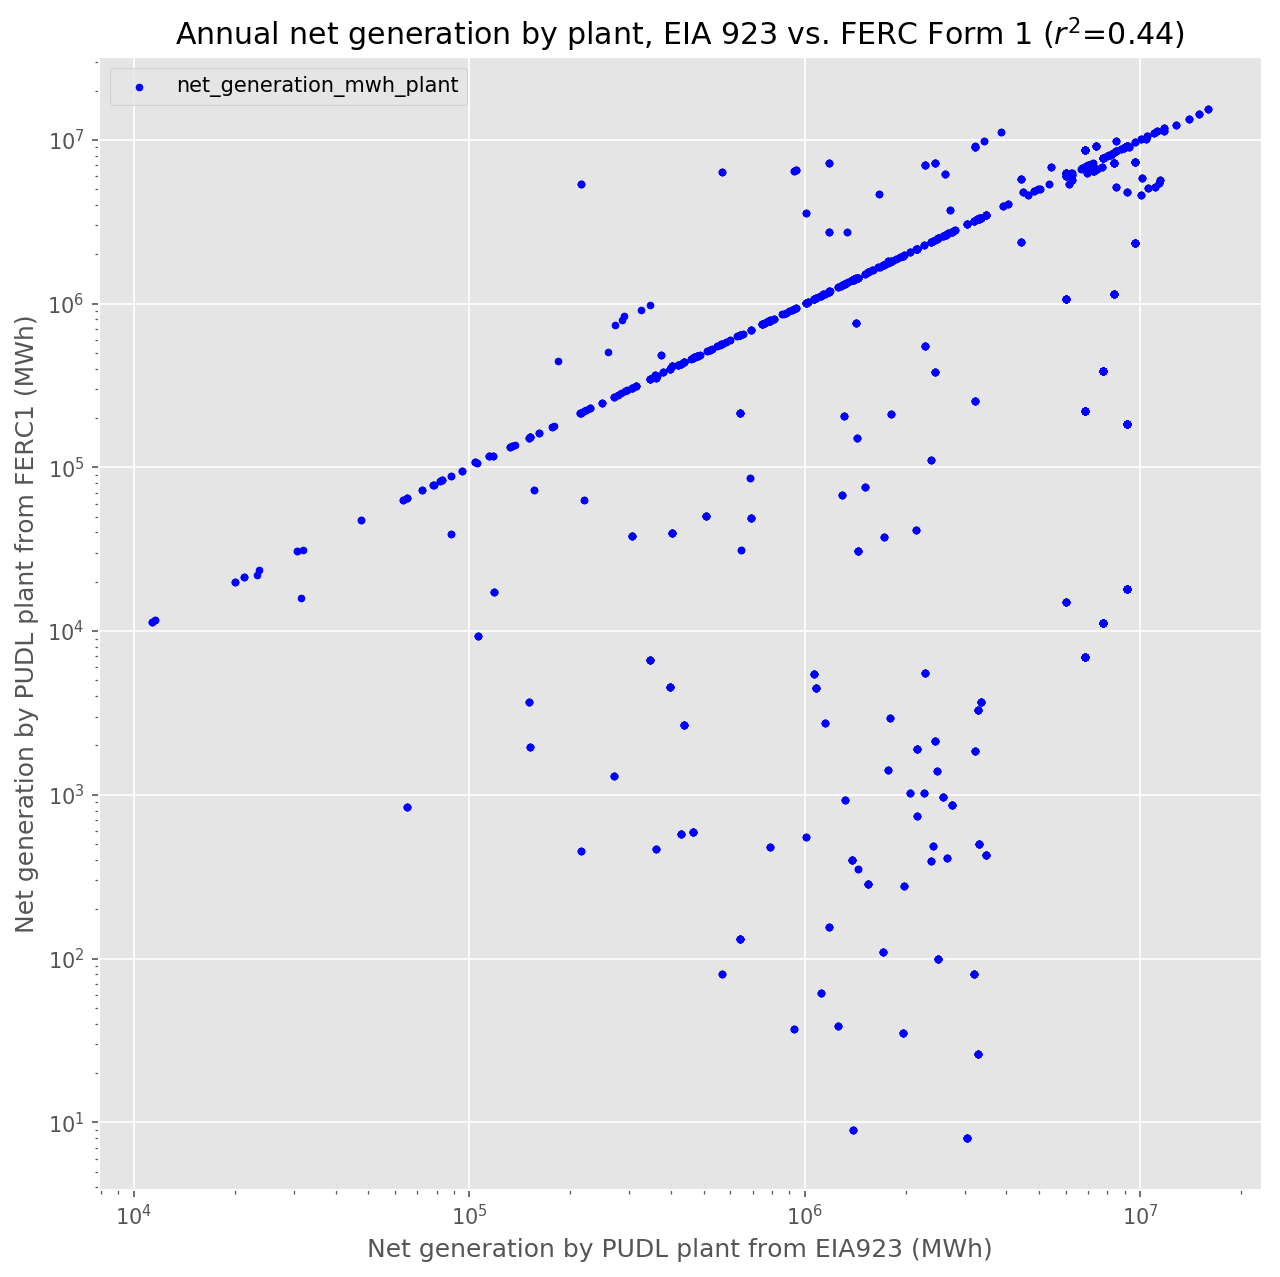

In [98]:
fuels = ['gas','oil','coal']
fig, (ax) = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.set_dpi(150)
ax.loglog()
plt.grid(b=True)
R2 = np.corrcoef(merged2.net_generation_mwh_plant_eia, merged2.net_generation_mwh_plant)[0,1]**2
ax.scatter(merged2.net_generation_mwh_plant_eia, merged2.net_generation_mwh_plant, s=10, color='blue')
ax.legend(loc='upper left')
plt.title("Annual net generation by plant, EIA 923 vs. FERC Form 1 ($r^2$={:.2f})".format(R2))
plt.xlabel("Net generation by PUDL plant from EIA923 (MWh)")
plt.ylabel("Net generation by PUDL plant from FERC1 (MWh)")
plt.show();

In [99]:
merged3 = merged.dropna(subset=['fuel_cost_annual_eia', 'expns_fuel'])

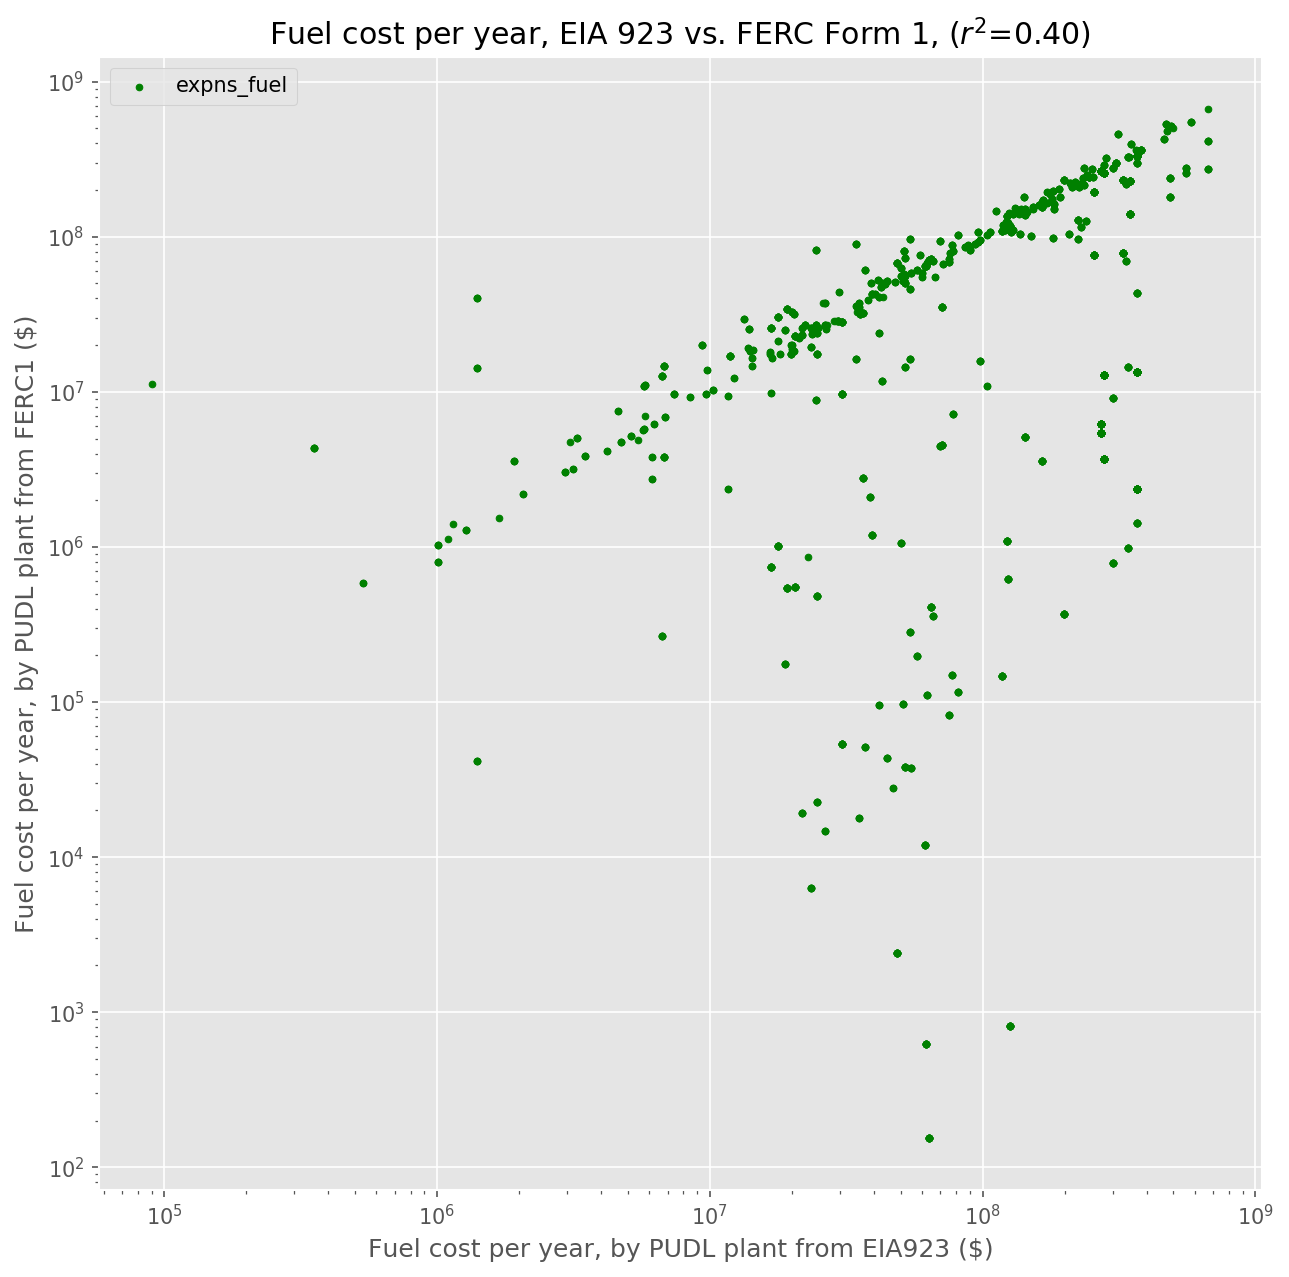

In [100]:
fuels = ['gas','oil','coal']
fig, (ax) = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.set_dpi(150)
ax.loglog()
plt.grid(b=True)
R2 = np.corrcoef(merged3.fuel_cost_annual_eia, merged3.expns_fuel)[0,1]**2
ax.scatter(merged3.fuel_cost_annual_eia, merged3.expns_fuel, s=10, color='green')
ax.legend(loc='upper left')
plt.title("Fuel cost per year, EIA 923 vs. FERC Form 1, ($r^2$={:.2f})".format(R2))
plt.xlabel("Fuel cost per year, by PUDL plant from EIA923 ($)")
plt.ylabel("Fuel cost per year, by PUDL plant from FERC1 ($)")
plt.show();

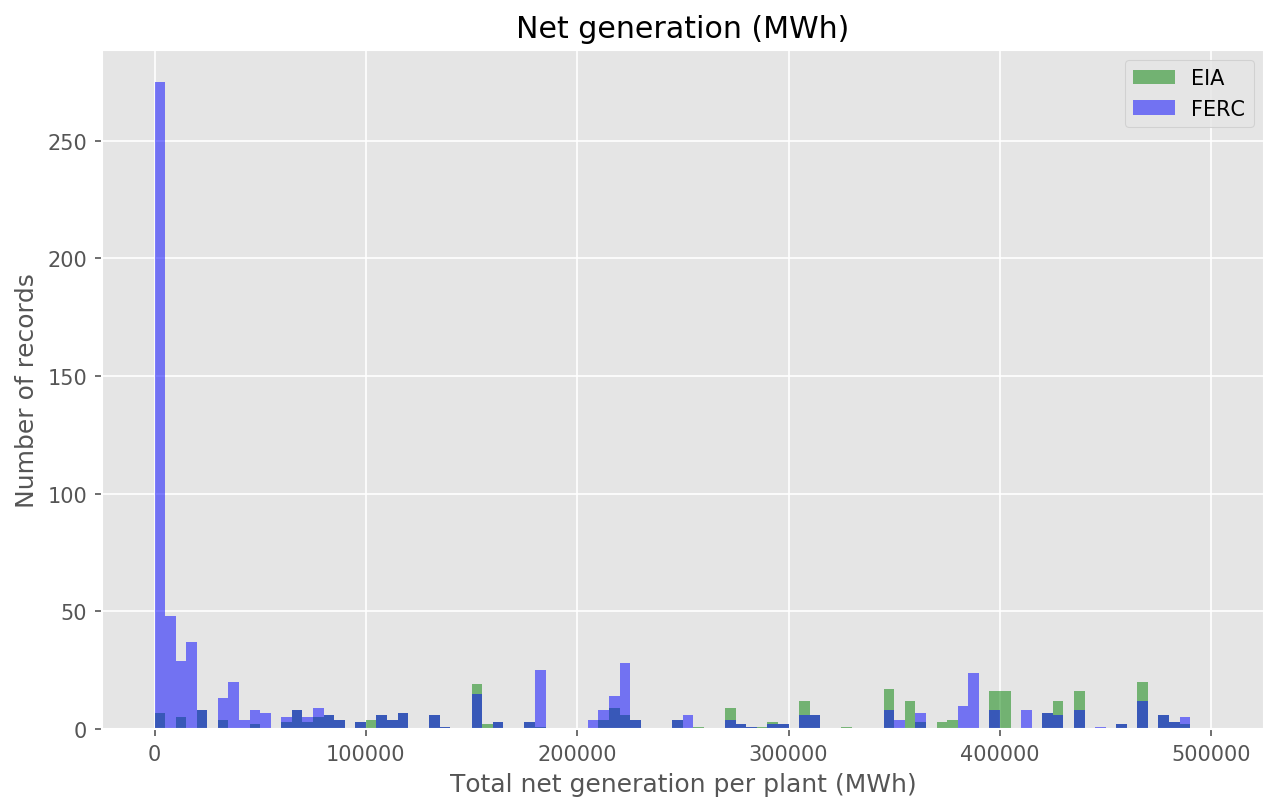

In [101]:
plt.hist(merged.net_generation_mwh_plant_eia, range=(0,500000), bins=100, alpha=0.5, color='green', label="EIA")
plt.hist(merged.net_generation_mwh_plant, range=(0,500000), bins=100, alpha=0.5, color='blue', label='FERC')
plt.xlabel("Total net generation per plant (MWh)")
plt.ylabel("Number of records")
plt.title("Net generation (MWh)")
plt.legend()

/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


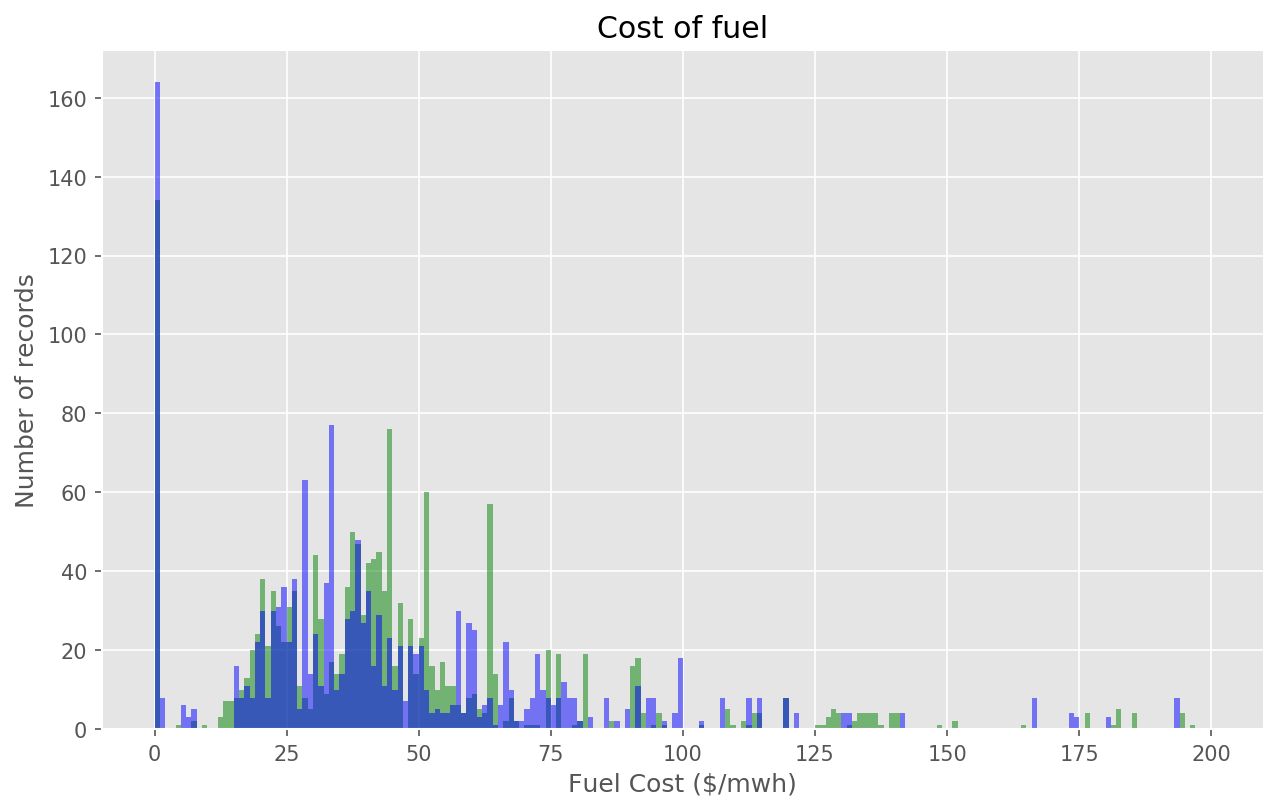

In [102]:
#quick look at spread in fuel_cost_per_mwh for these plants
plt.hist(merged.fuel_cost_per_mwh, range=(0,200), bins=200, alpha=0.5, color='green')
ferc_fuel_cost_per_mwh = merged.expns_fuel / merged.net_generation_mwh_plant
plt.hist(ferc_fuel_cost_per_mwh, range=(0,200), bins=200, alpha=0.5, color='blue')
plt.xlabel("Fuel Cost ($/mwh)")
plt.ylabel("Number of records")
plt.title("Cost of fuel")


## A few plots

/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


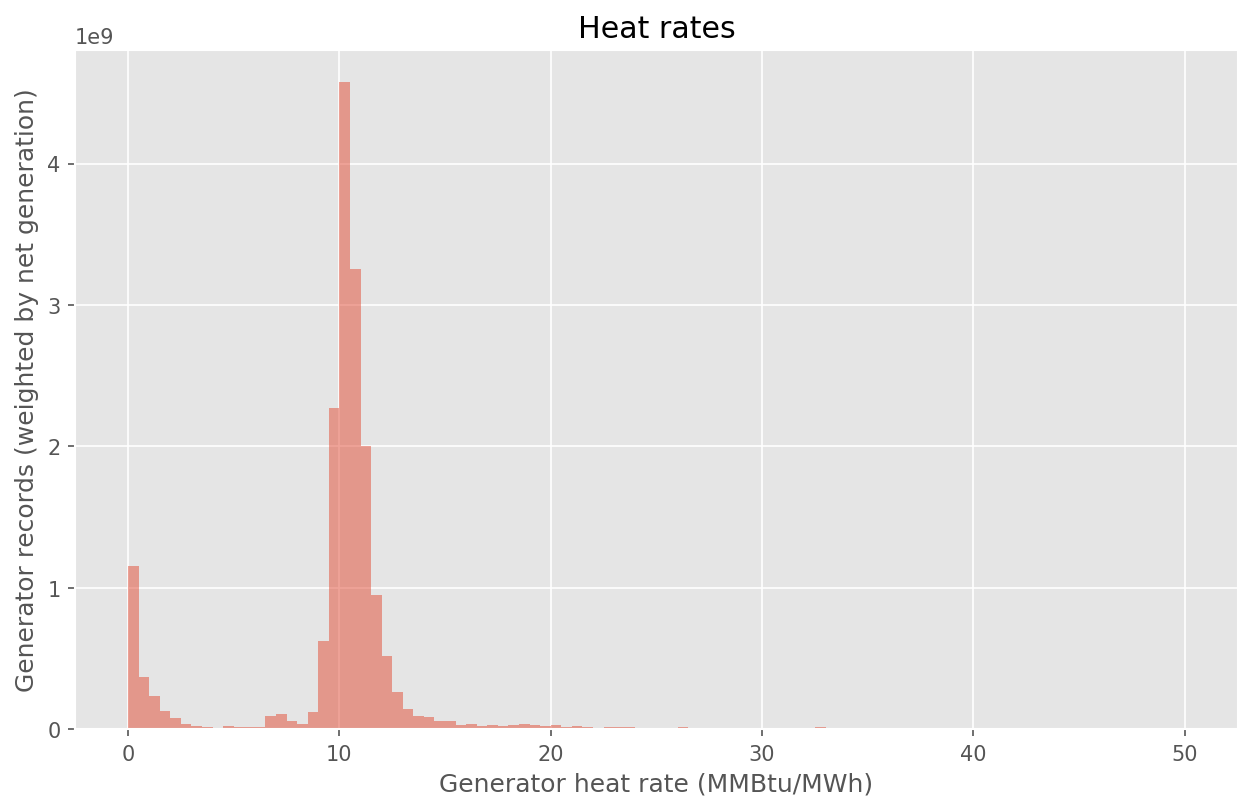

In [103]:
# Take a look at heat rates from EIA
plt.hist(heat_rate.heat_rate_mmbtu_mwh, range=[0,50],bins=100,weights=heat_rate.net_generation_mwh, alpha=0.5)
#heat_rate['heat_rate_mmbtu_mwh'].plot(kind='hist', bins=100, range=[-20,70])
plt.xlabel('Generator heat rate (MMBtu/MWh)')
plt.ylabel("Generator records (weighted by net generation)")
plt.title("Heat rates")
plt.show()

/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/home/alana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


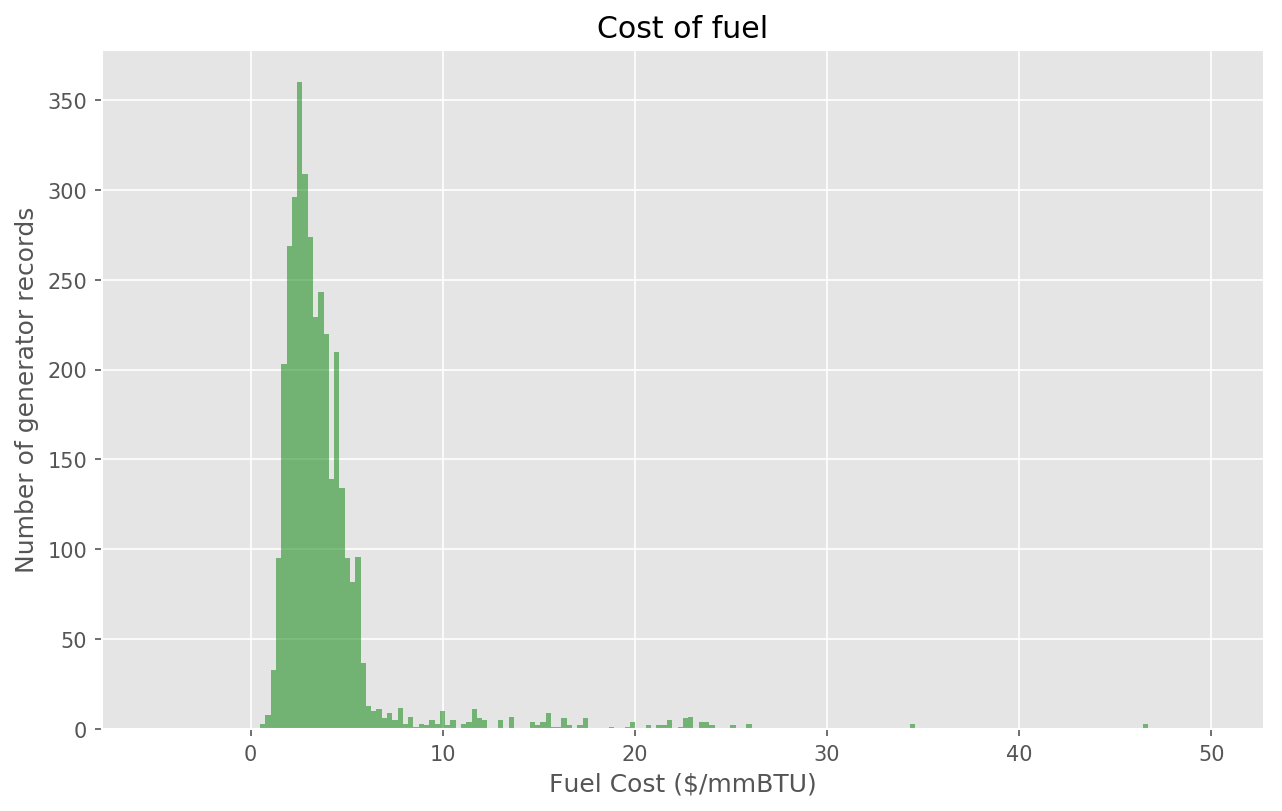

In [104]:
#quick look at spread in fuel_cost_per_mmbtu
plt.hist(mcoe_by_generator.fuel_cost_per_mmbtu_average, range=(-5,50), bins=200, alpha=0.5, color='green')
plt.xlabel("Fuel Cost ($/mmBTU)")
plt.ylabel("Number of generator records")
plt.title("Cost of fuel")
plt.legend()

/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/home/alana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


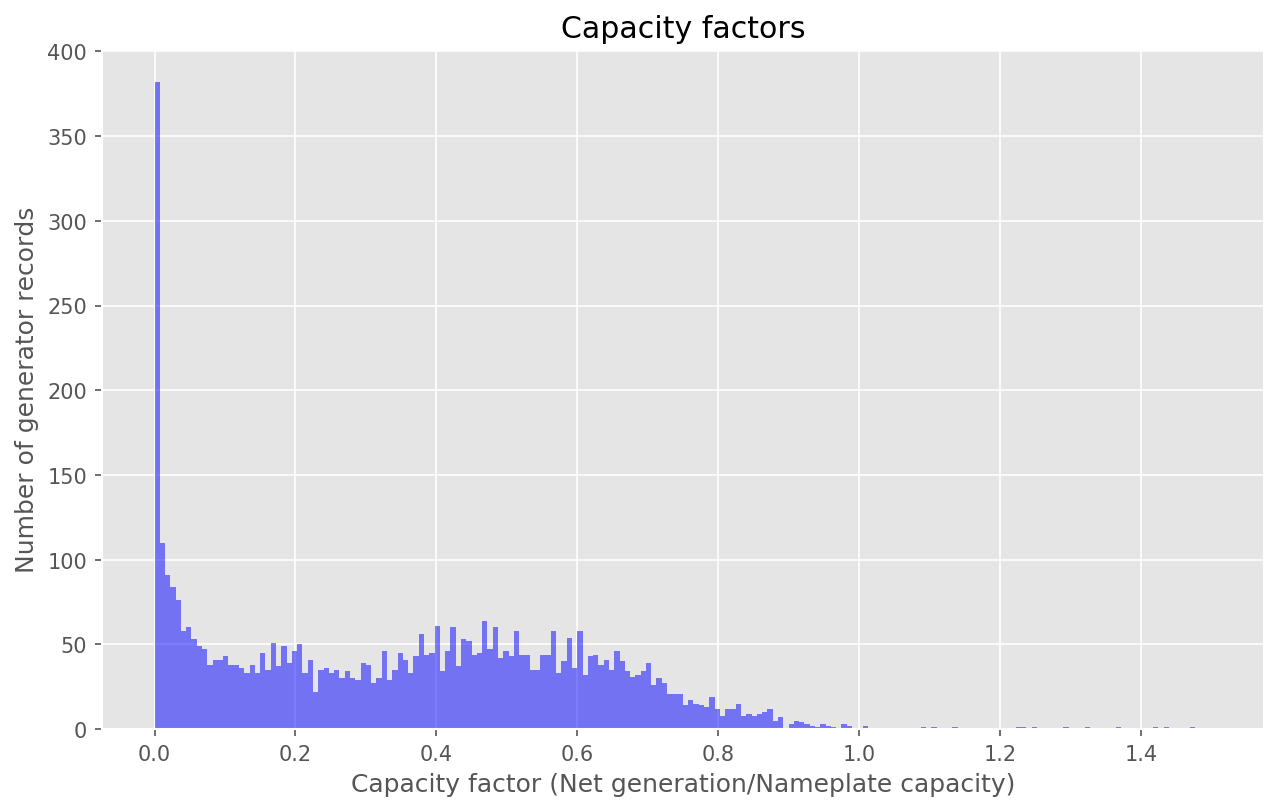

In [105]:
#quick look at capacity factors
plt.hist(mcoe_by_generator.capacity_factor, range=(0,1.5), bins=200, alpha=0.5, color='blue')
plt.xlabel("Capacity factor (Net generation/Nameplate capacity)")
plt.ylabel("Number of generator records")
plt.title("Capacity factors")
plt.legend()

/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/alana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/home/alana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


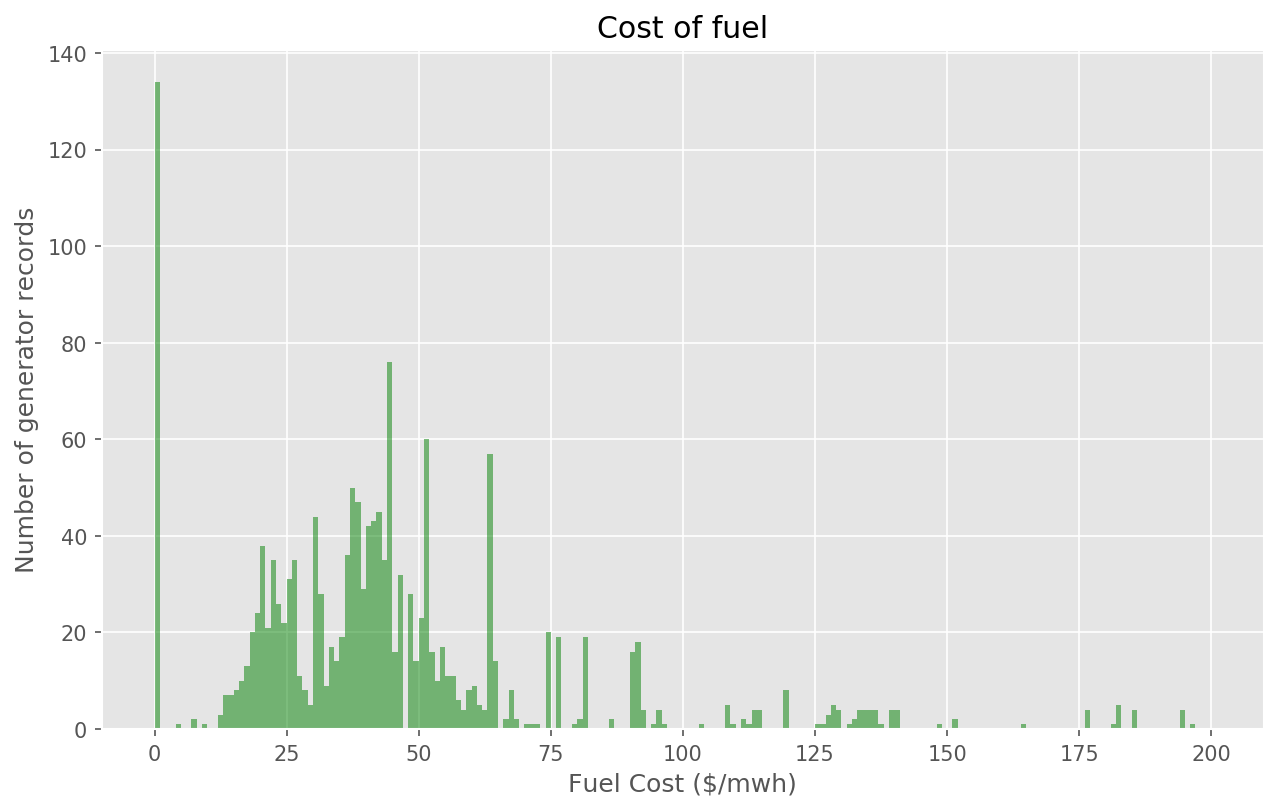

In [106]:
#quick look at spread in fuel_cost_per_mwh for these plants
plt.hist(merged.fuel_cost_per_mwh, range=(0,200), bins=200, alpha=0.5, color='green')
plt.xlabel("Fuel Cost ($/mwh)")
plt.ylabel("Number of generator records")
plt.title("Cost of fuel")
plt.legend()